In [ ]:
Author: Swarupa Aphale

In [ ]:
Data Science & Business Analytics Intern

In [ ]:
GRIP @ The Sparks Foundation

In [ ]:
Task 2: Prediction using Unsupervised ML

In [ ]:
Aim: 1) From the given 'Iris' dataset, predict the optimum number of clusters & represent it visually

## Step 1: Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

## Step 2: Loading of Dataset

In [2]:
# load data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Step 3: Data Visualization

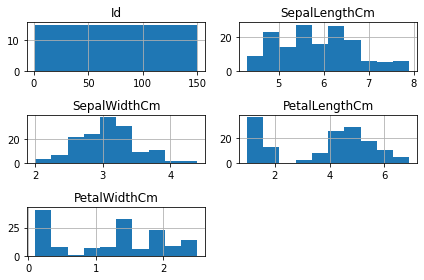

In [4]:
df.hist()
plt.tight_layout()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

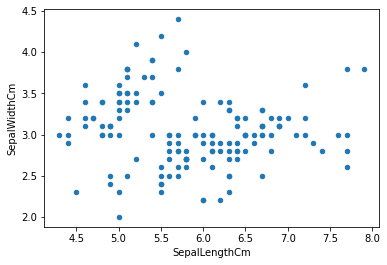

In [5]:
df.plot.scatter(x='SepalLengthCm',y='SepalWidthCm')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

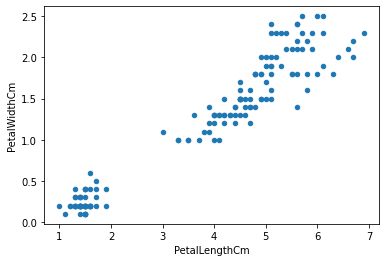

In [6]:
df.plot.scatter(x='PetalLengthCm',y='PetalWidthCm')

#### By looking at both the above scatter plot, we found that, Petal Length & Petal Width have positive linear relation. So only Petal Length & Petal Width will be selected as input parameters.

In [7]:
X = df[['PetalLengthCm','PetalWidthCm']]
X[:3]

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [8]:
import seaborn as sns
d = df.Species
d[:3]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: Species, dtype: object

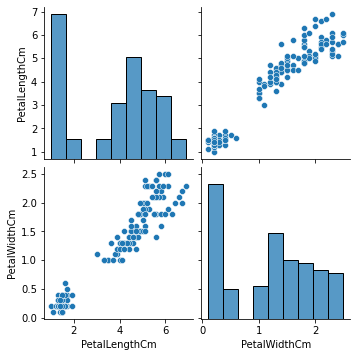

In [9]:
sns.pairplot(X)

### Finding the optimal number of clusters is an important part of KMeans algorithm. A commonly used method for finding the optimum K value is Elbow Method.  

### Elbow Method: In this method, we plot the WCSS (Within-Cluster Sum of Square)against different values of the K, and we select  the value of K at the elbow point in the graph, i.e., after which the value of WSCC remains constant (parallel to the x-axis)

In [10]:
wcss = []
for i in range(1,11):#i will take 1 to 10 cluster
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)

In [11]:
wcss

[550.6434666666667,
 86.40394533571005,
 31.387758974358977,
 19.499400899685114,
 13.933308757908756,
 11.089449150654415,
 9.207570634920636,
 7.832927180548921,
 6.530632636644404,
 5.732620463272639]

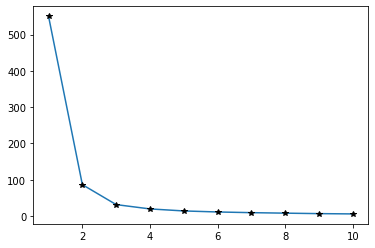

In [12]:
#check elbow: using Cluster vs inertia WCSS
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linestyle='',marker='*',color='k')

### From the above graph, we can say that k = 3, because after k = 3, graph is parallel to X-axis. So now, we will apply KMeans algorithm on our dataset with optimum number of clusters is equal to three.

### K-Mean Clustering - K-Means Clustering is an Unsupervised Learning algorithm used to group data points in an unlabeled dataset into different clusters based on closest proximity.

## Step 4: Perform KMeans Algorithm

In [13]:
model = KMeans(n_clusters = 3)

In [14]:
model

KMeans(n_clusters=3)

#### -Perform Model Training

In [15]:
model.fit(X)

KMeans(n_clusters=3)

In [16]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### -Perform Model Testing

In [17]:
model.predict([[2,0.4]])

array([0])

In [18]:
model.predict([[5,2]])

array([1])

In [19]:
model.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [20]:
model.cluster_centers_[:,0] #Petal_Length

array([1.464     , 5.59583333, 4.26923077])

In [21]:
model.cluster_centers_[:,1] #Petal_width

array([0.244     , 2.0375    , 1.34230769])

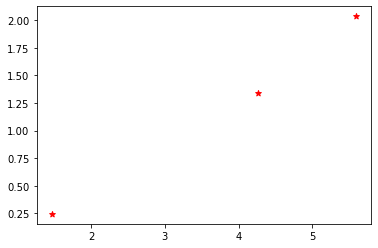

In [22]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*')

In [23]:
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
X[:2]

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2


In [25]:
X['Cluster'] = model.fit_predict(X)
X

,PetalLengthCm,PetalWidthCm,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [26]:
X.shape

(150, 3)

In [27]:
df1 = X[X['Cluster']==0]
df2 = X[X['Cluster']==1]
df3 = X[X['Cluster']==2]

In [28]:
df1[:2]

,PetalLengthCm,PetalWidthCm,Cluster
77,5.0,1.7,0
83,5.1,1.6,0


In [29]:
df2[:2]

,PetalLengthCm,PetalWidthCm,Cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [30]:
df3[:2]

,PetalLengthCm,PetalWidthCm,Cluster
50,4.7,1.4,2
51,4.5,1.5,2


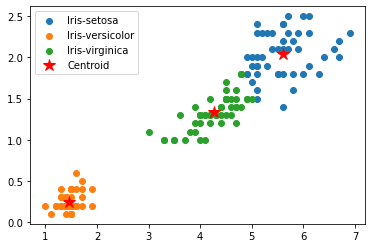

In [31]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],label='Iris-virginica')
# Cluster centroids
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',markersize=12,linestyle=' ',label='Centroid')
plt.legend()

In [32]:
X[:3]

,PetalLengthCm,PetalWidthCm,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1


## Step 5: Perform Evaluation Metrics

### Silhouette Score- The silhouette score and plot are used to evaluate the quality of a clustering solution produced by the k-means algorithm. The silhouette score measures the similarity of each point to its own cluster compared to other clusters. A high silhouette score indicates that the clusters are well separated. A silhouette score close to 0 suggests overlapping clusters, and a negative score suggests poor clustering solutions.

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(X,model.labels_)

0.7989383207402174

### Here, we are getting high Silhouette score, so we can say that clusters are well seperated.

##### Conclusion:

##### Successfully completed task 2 i.e. Prediction using Unsupervised ML. And looking at redults, we can say that overall performance of model is good.

##### Thank you!